In [1]:
# Import the modules
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

---

## Split the Data into Training and Testing Sets

In [2]:
# Load data 

train_data = pd.read_csv("https://machine-failure-data-20230822-craiguo.s3.us-west-2.amazonaws.com/train.csv")

train_data.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0


In [3]:
# Load data 
test_data = pd.read_csv("https://machine-failure-data-20230822-craiguo.s3.us-west-2.amazonaws.com/test.csv")

test_data.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,136429,L50896,L,302.3,311.5,1499,38.0,60,0,0,0,0,0
1,136430,L53866,L,301.7,311.0,1713,28.8,17,0,0,0,0,0
2,136431,L50498,L,301.3,310.4,1525,37.7,96,0,0,0,0,0
3,136432,M21232,M,300.1,309.6,1479,47.6,5,0,0,0,0,0
4,136433,M19751,M,303.4,312.3,1515,41.3,114,0,0,0,0,0


In [4]:
# Look at nunique counts for train
train_data.nunique()

id                         136429
Product ID                   9976
Type                            3
Air temperature [K]            95
Process temperature [K]        81
Rotational speed [rpm]        952
Torque [Nm]                   611
Tool wear [min]               246
Machine failure                 2
TWF                             2
HDF                             2
PWF                             2
OSF                             2
RNF                             2
dtype: int64

In [5]:
# Look at nunique counts for test
test_data.nunique()

id                         90954
Product ID                  9909
Type                           3
Air temperature [K]           92
Process temperature [K]       84
Rotational speed [rpm]       946
Torque [Nm]                  595
Tool wear [min]              246
TWF                            2
HDF                            2
PWF                            2
OSF                            2
RNF                            2
dtype: int64

In [6]:
X = train_data.drop(columns=["id", "Product ID", "Machine failure"])
y = train_data["Machine failure"]


In [7]:
#import RandomOverSampler and oversample data
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(random_state=1, sampling_strategy=.1)
X, y = oversample.fit_resample(X, y)

In [8]:
#One-hot encode X
X = pd.get_dummies(X)

In [9]:
# Split 
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state= 50)

---

## Create a Random Forest Model

In [10]:
 # Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)

# Fitting the model
rf_model = rf_model.fit(X_train, y_train)

In [11]:
# Making predictions using the testing data
predictions = rf_model.predict(X_val)

### Step 3: Evaluate the model’s performance by doing the following:

* Generate a confusion matrix.

* Calculate the accuracy score.

* Print the classification report.

In [12]:
 # Calculating the confusion matrix
cm = confusion_matrix(y_val, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_val, predictions)

In [13]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_val, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,33457,30
Actual 1,3,3438


Accuracy Score : 0.9991063691507799
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     33487
           1       0.99      1.00      1.00      3441

    accuracy                           1.00     36928
   macro avg       1.00      1.00      1.00     36928
weighted avg       1.00      1.00      1.00     36928



In [14]:
#Prep actual testing set for predictions to submit to kaggle
X_actual_test = test_data.drop(columns=["id", "Product ID"])
id_numbers = test_data['id'].tolist()

In [15]:
#One-hot encode the actual testing data
X_actual_test = pd.get_dummies(X_actual_test)

In [16]:
# Making predictions using the actual testing data
test_predictions = rf_model.predict(X_actual_test)
predict_list = []
for i in test_predictions:
    predict_list.append([i][0])


In [17]:
#Compiling predictions into a dataframe
submission_df = pd.DataFrame({"id": id_numbers, "Machine failure": test_predictions})
submission_df.head()

,id,Machine failure
0,136429,0
1,136430,0
2,136431,0
3,136432,0
4,136433,0


In [18]:
#Saving the dataframe as a csv
#submission_df.to_csv("../Predictions_for_Kaggle/random_forest_prediction_submission.csv", index = False)

In [19]:
#check for most important features
importance = rf_model.feature_importances_
for value in importance:
    print(value)

0.059420776919894704
0.042390346068009045
0.12654919007106324
0.1328504598116408
0.06786457480421221
0.0799853282935219
0.22545694002545666
0.09162074156836278
0.167319353117234
0.00023843166400414
0.0015706356030920836
0.0026200444438233142
0.002113177609685116


In [20]:
#look at sorted importances
top_importance = sorted(zip(importance, X.columns), reverse=True)
top_importance[0:]

[(0.22545694002545666, 'HDF'),
 (0.167319353117234, 'OSF'),
 (0.1328504598116408, 'Torque [Nm]'),
 (0.12654919007106324, 'Rotational speed [rpm]'),
 (0.09162074156836278, 'PWF'),
 (0.0799853282935219, 'TWF'),
 (0.06786457480421221, 'Tool wear [min]'),
 (0.059420776919894704, 'Air temperature [K]'),
 (0.042390346068009045, 'Process temperature [K]'),
 (0.0026200444438233142, 'Type_L'),
 (0.002113177609685116, 'Type_M'),
 (0.0015706356030920836, 'Type_H'),
 (0.00023843166400414, 'RNF')]

<AxesSubplot:title={'center':'Features Importances'}, ylabel='1'>

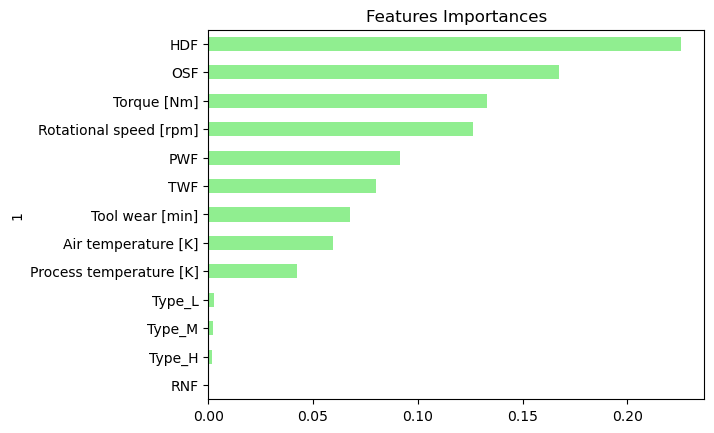

In [21]:
#plot top five importances
# Visualize the features by importance
importances_df = pd.DataFrame(top_importance)
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)